# Training a Multi-layer Neural Networks

### Load MNIST Dataset

In [4]:
# from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import numpy as np
from scipy import io

mnist = io.loadmat('mnist-original.mat')
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

### Splitting data

In [5]:
X, y = mnist['data'], mnist['label']
X.shape

(784, 70000)

In [6]:
y.shape

(1, 70000)

In [7]:
X = np.array(X).T # transpose
X.shape

(70000, 784)

In [8]:
y = np.array(y).T
y.shape

(70000, 1)

In [9]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [10]:
y[0]

array([0.])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

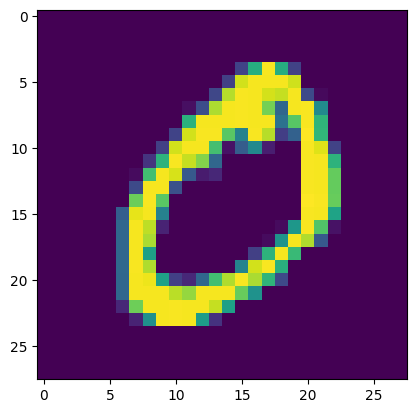

In [11]:
%matplotlib inline 
ex1 = X[0] 
ex1_image = ex1.reshape(28, 28) 
plt.imshow(ex1_image) 
plt.plot

In [12]:
X = X / 255.0

In [13]:
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

### Building a Multi-layer Neural Networks and Training the model

In [14]:
# Multi-layer neural network and backpropagation learning
# Mini Batch Stochastic Gradient Descent
class MLPbatch():
    
    def __init__(self, n_hidden=5, epochs=100, lr=0.1, batch_size=100):
        self.n_hidden = n_hidden         # number of neurons in hidden layers
        self.epochs = epochs             # number epochs
        self.lr = lr                     # learning rate
        self.batch_size = batch_size     # mini-batch size
        
    # sigmoid function
    def sigmoid(self, z):
        return (1.0 / (1.0 + np.exp(-z)))
    
    # change the class labels to one-hot
    # [[0],       [[1, 0, 0, 0, 0, ...],
    #  [2],  -->   [0, 0, 1, 0, 0, ...],
    #  ...]        ...                 ]
    def onehot_encoding(self, y):
        
        n_sample = y.shape[0]
        n_class = np.unique(y).shape[0]
        
        y_enc = np.zeros((n_sample, n_class))
        for idx, val in enumerate(y.astype(int)):
            y_enc[idx, val] = 1.0
            
        return y_enc       

    # forward computation
    # h = sigmoid(xw + b)
    # o = sigmoid(hw + b)
    def forward(self, x):
        
        zx = np.dot(x, self.wx) + self.bx
        h = self.sigmoid(zx)
        
        zh = np.dot(h, self.wh) + self.bh
        o = self.sigmoid(zh)
        
        return zx, h, zh, o
    
    # loss = mean square error
    def compute_loss(self, y, o):
        
        N = y.shape[0]
        loss = 0.5 * np.sum((y - o)**2) / N
        
        return loss
        
    # backpropagation learning with training data
    # initialize parameters and perform mini-batch stochastic gradient descent
    def fit(self, X_train, y_train):
        
        n_sample = X_train.shape[0]             # number of taining data
        n_feature = X_train.shape[1]            # number of features (number of inputs)
        n_output = np.unique(y_train).shape[0]  # number of classes (number of outputs)
        
        # change y to one-hot encoding
        y_train_enc = self.onehot_encoding(y_train)

        # initializing parameters w and b for each layer
        # wx: [784, n_hidden], bx: [1, n_hidden]
        # wh: [n_hidden, 10], bx: [1, 10]
        self.wx = np.random.normal(loc=0.0, scale=0.1, size=(n_feature, self.n_hidden))
        self.bx = np.zeros((1, self.n_hidden))
         
        self.wh = np.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        self.bh = np.zeros((1, n_output))
        
        for e in range(self.epochs):
            
            # update parameters for batch of sample data
            for start_idx in range(0, n_sample-self.batch_size+1, self.batch_size):
                
                # x: [batch_size, 784], y: [batch_size, 10]
                x = X_train[start_idx : start_idx + self.batch_size]
                y = y_train_enc[start_idx : start_idx + self.batch_size]

                # compute h: [batch_size, n_hidden] and o: [batch_size, 10]
                zx, h, zh, o = self.forward(x)
                                
                # compute deltas and update parameters
                # delta_o: [batch_size, 10], delta_h: [batch_size, n_hidden]
                
                delta_o = (y - o) * o * (1 - o)
                delta_h = (delta_o @ np.transpose(self.wh)) * h * (1 - h)

                self.wh += ((np.transpose(h) @ delta_o) * self.lr)
                self.bh += (np.sum(delta_o, axis=0, keepdims=True) * self.lr)
                 
                self.wx += ((np.transpose(x) @ delta_h) * self.lr)
                self.bx += (np.sum(delta_h, axis=0, keepdims=True) * self.lr)    

                
            # compute average error and accuracy for each epoch, and show
            zx, h, zh, o = self.forward(X_train)
            mse = self.compute_loss(y_train_enc, o) 
            
            y_train_pred = self.predict(X_train).reshape(-1, 1)
            train_acc = np.sum(y_train == y_train_pred) / n_sample
            
            print("Epoch %d MSE: %.2f Accuracy: %.2f" % (e, mse, train_acc))
         
    # predict class of x using the learned model
    def predict(self, x):
        
        zx, h, zh, o = self.forward(x)
        y_pred = np.argmax(o, axis=1)
        
        return y_pred
    

In [15]:
# create the model with hidden layer neuron 50, epochs 100, learning rate 0.01, batch size 100
model = MLPbatch(n_hidden=50, epochs=100, lr=0.01, batch_size=100)

# backpropagation learning with the training data
model.fit(X_train, y_train)

Epoch 0 MSE: 0.87 Accuracy: 0.10
Epoch 1 MSE: 0.83 Accuracy: 0.10
Epoch 2 MSE: 0.76 Accuracy: 0.10
Epoch 3 MSE: 0.70 Accuracy: 0.10
Epoch 4 MSE: 0.66 Accuracy: 0.12
Epoch 5 MSE: 0.64 Accuracy: 0.15
Epoch 6 MSE: 0.61 Accuracy: 0.18
Epoch 7 MSE: 0.60 Accuracy: 0.21
Epoch 8 MSE: 0.58 Accuracy: 0.23
Epoch 9 MSE: 0.57 Accuracy: 0.24
Epoch 10 MSE: 0.56 Accuracy: 0.26
Epoch 11 MSE: 0.55 Accuracy: 0.27
Epoch 12 MSE: 0.55 Accuracy: 0.27
Epoch 13 MSE: 0.54 Accuracy: 0.28
Epoch 14 MSE: 0.54 Accuracy: 0.29
Epoch 15 MSE: 0.53 Accuracy: 0.31
Epoch 16 MSE: 0.53 Accuracy: 0.32
Epoch 17 MSE: 0.52 Accuracy: 0.33
Epoch 18 MSE: 0.51 Accuracy: 0.34
Epoch 19 MSE: 0.51 Accuracy: 0.34
Epoch 20 MSE: 0.50 Accuracy: 0.35
Epoch 21 MSE: 0.49 Accuracy: 0.36
Epoch 22 MSE: 0.48 Accuracy: 0.37
Epoch 23 MSE: 0.47 Accuracy: 0.38
Epoch 24 MSE: 0.46 Accuracy: 0.39
Epoch 25 MSE: 0.45 Accuracy: 0.40
Epoch 26 MSE: 0.44 Accuracy: 0.41
Epoch 27 MSE: 0.44 Accuracy: 0.42
Epoch 28 MSE: 0.44 Accuracy: 0.42
Epoch 29 MSE: 0.43 Accur

### Prediction using the model

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

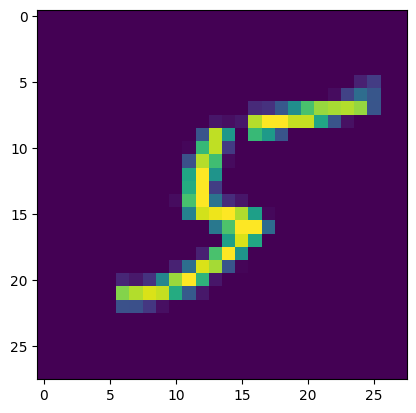

In [16]:
%matplotlib inline 
ex1 = X[35000] 
ex1_image = ex1.reshape(28, 28) 
plt.imshow(ex1_image) 
plt.plot

In [17]:
model.predict([ex1])

array([5], dtype=int64)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

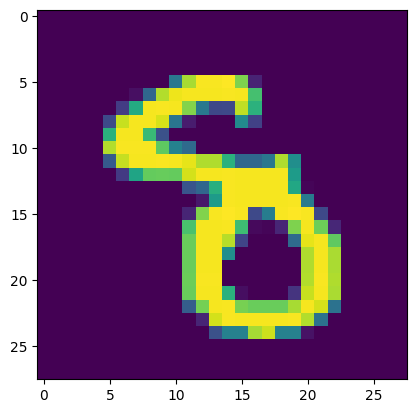

In [18]:
%matplotlib inline 
ex2 = X[50000] 
ex2_image = ex2.reshape(28, 28) 
plt.imshow(ex2_image) 
plt.plot

In [19]:
model.predict([ex2])

array([8], dtype=int64)